In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Loading data and Pre-processing

In [ ]:
#importing the data files
from google.colab import files
uploaded = files.upload()

Saving FoDS-Assignment-2.csv to FoDS-Assignment-2 (1).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['FoDS-Assignment-2.csv']))
print(data.shape)
data.describe()

(1188, 14)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,1188.000000,1188.000000,1174.000000,1.188000e+03,1175.000000,1188.000000,1188.000000,1188.000000,1188.000000,1174.000000,1188.000000,1188.000000,1188.000000,1.188000e+03
mean,3.382997,2.143098,2124.656729,1.579757e+04,1.509787,0.003367,0.245791,3.425926,7.687710,1815.946337,304.373737,2019.319865,12889.924242,5.524078e+05
std,0.930045,0.779664,963.523312,6.174847e+04,0.538261,0.057953,0.768059,0.658354,1.175121,859.517568,457.131093,686.068063,26913.741656,3.853805e+05
min,1.000000,0.500000,550.000000,6.960000e+02,1.000000,0.000000,0.000000,2.000000,5.000000,550.000000,0.000000,710.000000,942.000000,1.100000e+05
25%,3.000000,1.750000,1450.000000,5.198500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1510.000000,5178.250000,3.297125e+05
50%,3.000000,2.250000,1950.000000,7.687000e+03,1.500000,0.000000,0.000000,3.000000,8.000000,1590.000000,0.000000,1880.000000,7665.000000,4.621850e+05
75%,4.000000,2.500000,2630.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2250.000000,580.000000,2439.250000,10075.750000,6.623750e+05
max,8.000000,6.000000,9200.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,6640.000000,3000.000000,5790.000000,425581.000000,5.570000e+06


In [ ]:
print(data.isna().sum())
data = data.fillna(data.mean())
print('nan values in features after using fillna:')
print(data.isna().sum())
print(data.shape)

bedrooms          0
bathrooms         0
sqft_living      14
sqft_lot          0
floors           13
waterfront        0
view              0
condition         0
grade             0
sqft_above       14
sqft_basement     0
sqft_living15     0
sqft_lot15        0
price             0
dtype: int64
nan values in features after using fillna:
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64
(1188, 14)


In [ ]:
data.shape

(1188, 14)

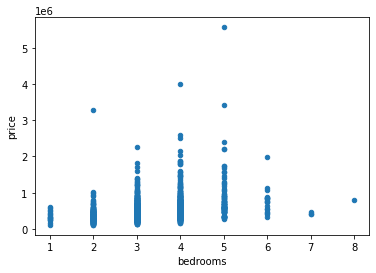

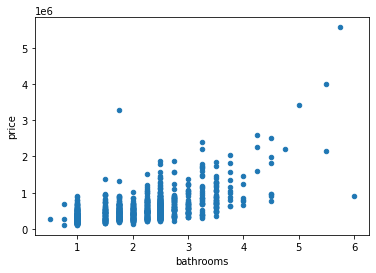

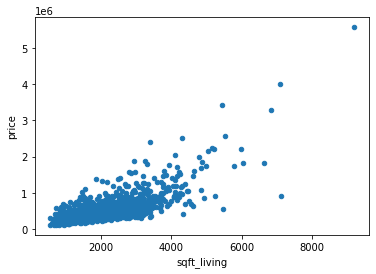

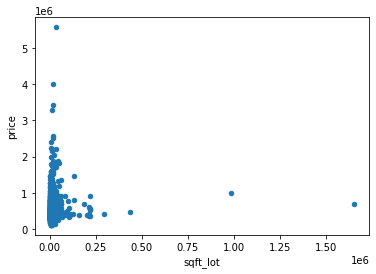

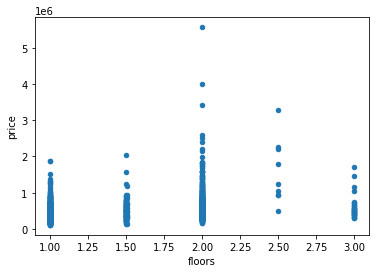

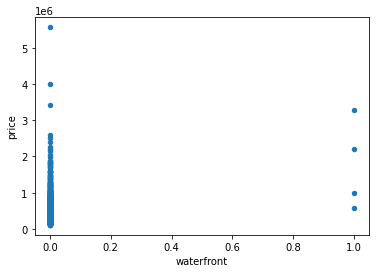

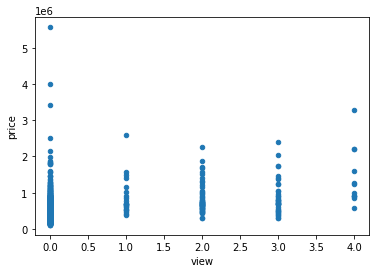

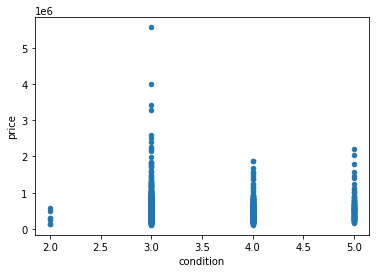

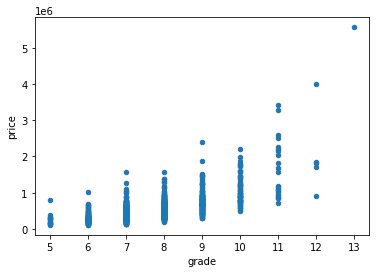

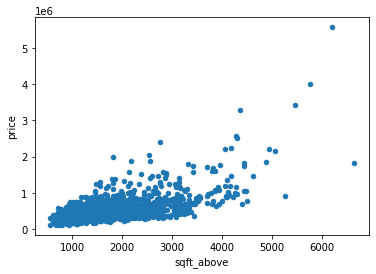

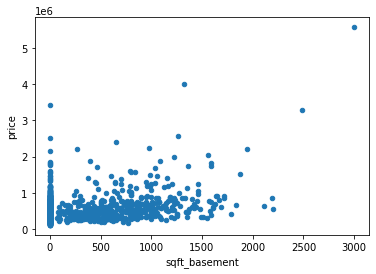

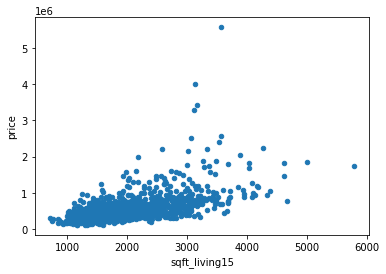

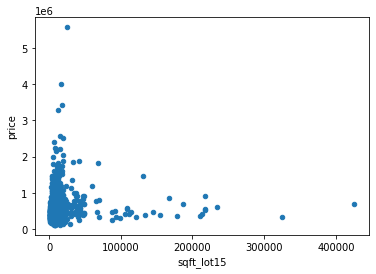

In [ ]:
y1 = 'price'
kind1 = 'scatter'
data.plot(x='bedrooms', y=y1, kind= kind1)
data.plot(x='bathrooms', y=y1, kind= kind1)
data.plot(x='sqft_living', y=y1, kind= kind1)
data.plot(x='sqft_lot', y=y1, kind= kind1)
data.plot(x='floors', y=y1, kind= kind1)
data.plot(x='waterfront', y=y1, kind= kind1)
data.plot(x='view', y=y1, kind= kind1)
data.plot(x='condition', y=y1, kind= kind1)
data.plot(x='grade', y=y1, kind= kind1)
data.plot(x='sqft_above', y=y1, kind= kind1)
data.plot(x='sqft_basement', y=y1, kind= kind1)
data.plot(x='sqft_living15', y=y1, kind= kind1)
data.plot(x='sqft_lot15', y=y1, kind= kind1)

In [ ]:
data_1=data.sample(frac=1, random_state=10) 
data_1.iloc[:,0:14]= data_1.iloc[:,0:14].apply(lambda x : (x-x.mean())/x.std(),axis=0) #normalize
mask = ~(abs(data_1) > 3)
mask.iloc[:,-1] = True
data_processed = data_1[mask].dropna()
print('Found and removed', data.shape[0] - data_processed.shape[0], 'outliers')
data_processed.shape

Found and removed 107 outliers


(1081, 14)

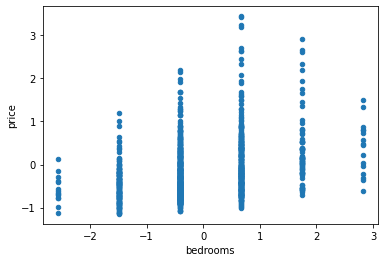

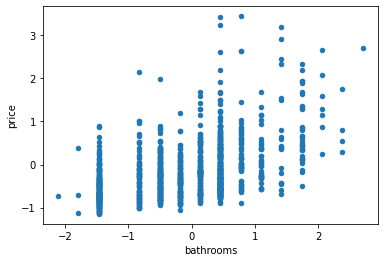

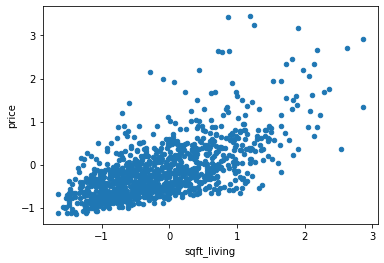

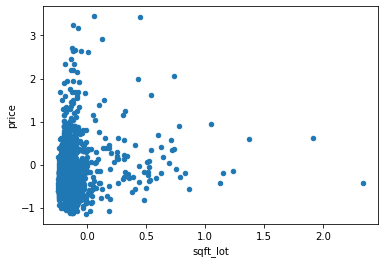

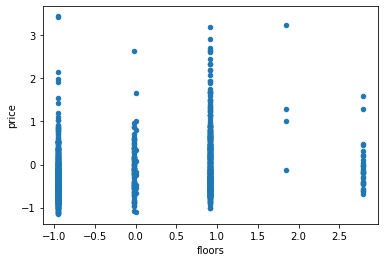

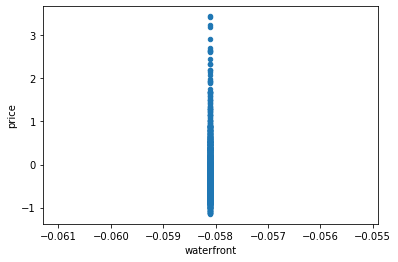

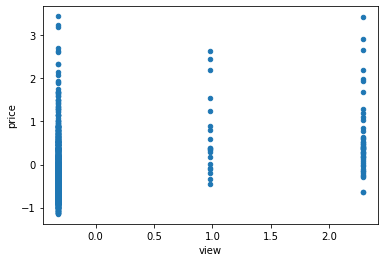

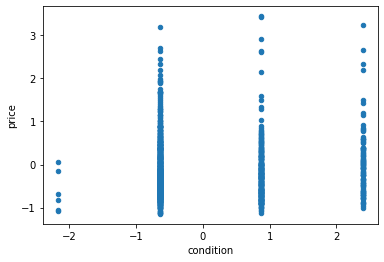

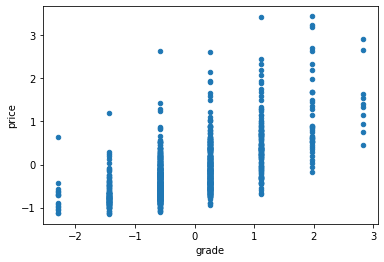

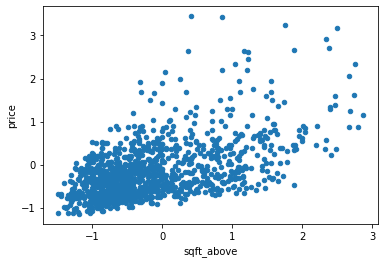

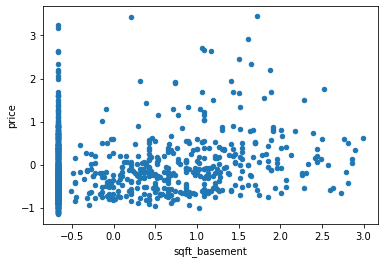

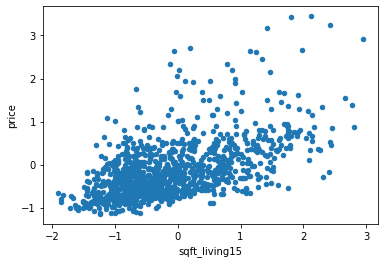

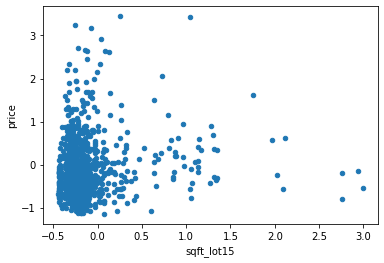

In [ ]:
data_processed.plot(x='bedrooms', y=y1, kind= kind1)
data_processed.plot(x='bathrooms', y=y1, kind= kind1)
data_processed.plot(x='sqft_living', y=y1, kind= kind1)
data_processed.plot(x='sqft_lot', y=y1, kind= kind1)
data_processed.plot(x='floors', y=y1, kind= kind1)
data_processed.plot(x='waterfront', y=y1, kind= kind1)
data_processed.plot(x='view', y=y1, kind= kind1)
data_processed.plot(x='condition', y=y1, kind= kind1)
data_processed.plot(x='grade', y=y1, kind= kind1)
data_processed.plot(x='sqft_above', y=y1, kind= kind1)
data_processed.plot(x='sqft_basement', y=y1, kind= kind1)
data_processed.plot(x='sqft_living15', y=y1, kind= kind1)
data_processed.plot(x='sqft_lot15', y=y1, kind= kind1)

In [ ]:
train,test= np.split(data_processed,[int(.7*len(data_processed))])
train=np.array(train) 
test=np.array(test)
print(data_processed.shape)
print(test.shape)
print(train.shape)

(1081, 14)
(325, 14)
(756, 14)


In [ ]:
x_train = train[:,0:13]
y_train = train[:,13]
x_test = test[:,0:13]
y_test = test[:,13]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(756, 13) (325, 13) (756,) (325,)


# Linear regression

In [ ]:
def generate_w_c(X,n,disp=False):#no of features
  W= np.zeros(n+1)
  X_ = np.c_[np.ones(X.shape[0]),X] #adding ones
  return W,X_

In [ ]:
def rmse(X,y,w):
    mse = ( (X@(w) -y)**2).mean() 
    return (np.sqrt(mse))

def squared_error(X,y,w):
    return np.sum((X@w-y)**2)

In [ ]:
def linearRegression(X,y,W):
  alpha = 0.001
  iters = 8000
  cost_hist = np.zeros((iters,1))
  for i in range(iters):
        h= X @ W
        W = W - X.T @ (h - y) *(alpha/len(y)) 
        cost_hist[i] = rmse(X, y, W)
  return  cost_hist, W

In [ ]:
# Implementing Linear Regression on the Processed data 
W,X_sample_train = generate_w_c(x_train,x_train.shape[1])
W_text,X_sample_test_model = generate_w_c(x_test,x_test.shape[1])
cost_history,W_cal = linearRegression(X_sample_train,y_train,W)
least_error = np.min(cost_history)
print('Minimum training error for Processed data = ', least_error)
print('Testing error for Processed data= ', rmse(X_sample_test_model,y_test,W_cal))

Minimum training error for Processed data =  0.4722910103533441
Testing error for Processed data=  0.4228908392137024


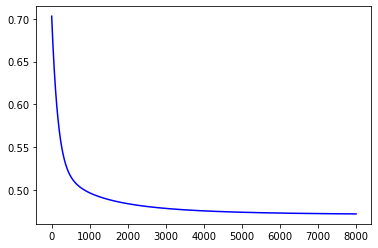

In [ ]:
x_axis = range(len(cost_history))
plt.plot(x_axis, cost_history, 'b')

In [ ]:
def test_cost(x_test,w,y_test):
  return rmse(x_test,y_test,w)

W_,X_sample_test = generate_w_c(x_test,x_train.shape[1])
test_cost(X_sample_test,W_cal,y_test)

0.4228908392137024

In [ ]:
k = int(.7*len(data))
train_unprocessed,test = np.split(data, [k])
train_unprocessed = np.array(train) 
test_unprocessed = np.array(test)
print(data.shape)
print(test_unprocessed.shape)
print(train_unprocessed.shape)

(1188, 14)
(357, 14)
(756, 14)


In [ ]:
x_train_unprocessed = train_unprocessed[:,0:13]
y_train_unprocessed = train_unprocessed[:,13]
x_test_unprocessed = test_unprocessed[:,0:13]
y_test_unprocessed = test_unprocessed[:,13]
print(x_train_unprocessed.shape, x_test_unprocessed.shape, y_train_unprocessed.shape, y_test_unprocessed.shape)

(756, 13) (357, 13) (756,) (357,)


In [ ]:
W,X_sample_train = generate_w_c(x_train_unprocessed, x_train_unprocessed.shape[1])
W_text,X_sample_test_model = generate_w_c(x_test_unprocessed, x_train_unprocessed.shape[1])
cost_history,W_cal = linearRegression(X_sample_train, y_train_unprocessed, W)
print('Least training error for raw data = ', np.min(cost_history))
print('Testing error for raw data = ', rmse(X_sample_test_model, y_test_unprocessed, W_cal))

Least training error for raw data =  0.4722910103533441
Testing error for raw data =  789504.4784247022


# Greedy forward feature selection

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15']

In [ ]:
def greedy_forward_feature_selection(X, y):
    n, m = X.shape
    selected_subset = []
    # initialize the error
    error = np.zeros(m)
    error_train = np.zeros(m)
    error_history = [] # Max we can take m features, store lowest error
    error_history_train = []
    selected_subset_hist = []
    # corresponding to i features
    # Initial one feature model
    for i in range(m):
        # get the feature
        feature = X[:, i]
        #print(f"Generating model for {features[i]}")
        W,X_model = generate_w_c(feature,1)
        cost_history_model,W_model = linearRegression(X_model,y,W)
        # get the error
        error_train[i] = np.min(cost_history_model)
        _,X_test_model = generate_w_c(x_test[:,i],1)
        error[i] = rmse(X_test_model,y_test,W_model)
    selected_subset.append(np.argmin(error))
    selected_subset_hist.append(selected_subset.copy())
    print('Feature subset: ', selected_subset)
    print('Training cost: ', np.min(error_train))
    print('Testing cost: ', np.min(error))
    error_history.append(np.min(error))
    error_history_train.append(np.min(error_train))

    reached_best_case = False
    while len(selected_subset) != m:
      n_selected = len(selected_subset)
      # build a model with n_selected + 1 
      cost_temp = np.zeros(m)
      cost_temp_train = np.zeros(m)
      for f in selected_subset:
        cost_temp[f] = np.inf
        cost_temp_train[f] = np.inf

      for i in range(m):
        if i not in selected_subset:
          temp_selected = [feat for feat in selected_subset] 
          temp_selected.append(i)
          assert len(temp_selected) == n_selected + 1
          feature = X[:,temp_selected]
          W,X_model = generate_w_c(feature,n_selected+1)
          _,X_test_model = generate_w_c(x_test[:,temp_selected],n_selected+1)
          cost_history_model,W_model = linearRegression(X_model,y,W)
          cost_temp_train[i] = np.min(cost_history_model)
          cost_temp[i] = rmse(X_test_model,y_test,W_model)

      if np.min(cost_temp) <= np.min(error_history):
        selected_subset.append(np.argmin(cost_temp))
        selected_subset_hist.append(selected_subset.copy())
        print('Feature subset: ', selected_subset)
        print('Training cost: ', np.min(cost_temp_train))
        print('Testing cost: ', np.min(cost_temp))
        error_history.append(np.min(cost_temp))
        error_history_train.append(np.min(cost_temp_train))
        
      else:
        reached_best_case = True
        selected_subset.append(np.argmin(cost_temp))
        selected_subset_hist.append(selected_subset.copy())
        print('Feature subset: ', selected_subset)
        print('Training cost: ', np.min(cost_temp_train))
        print('Testing cost: ', np.min(cost_temp))
        error_history.append(np.min(cost_temp))
        error_history_train.append(np.min(cost_temp_train))
    return selected_subset,error_history,error_history_train,selected_subset_hist 

In [ ]:
selected_subset,error_hist,error_hist_train,selected_subset_hist = greedy_forward_feature_selection(x_train,y_train)

Feature subset:  [2]
Training cost:  0.5326540247909184
Testing cost:  0.4600841073669803
Feature subset:  [2, 8]
Training cost:  0.505077449963423
Testing cost:  0.4490162464366897
Feature subset:  [2, 8, 6]
Training cost:  0.48357282011297564
Testing cost:  0.4353279678579299
Feature subset:  [2, 8, 6, 7]
Training cost:  0.47505340866743234
Testing cost:  0.4266913246666559
Feature subset:  [2, 8, 6, 7, 12]
Training cost:  0.4738848631346598
Testing cost:  0.4255977859454102
Feature subset:  [2, 8, 6, 7, 12, 10]
Training cost:  0.47308173693847866
Testing cost:  0.4248366910409668
Feature subset:  [2, 8, 6, 7, 12, 10, 9]
Training cost:  0.47305770105446127
Testing cost:  0.423482555604448
Feature subset:  [2, 8, 6, 7, 12, 10, 9, 0]
Training cost:  0.47323114687812756
Testing cost:  0.42265711665618083
Feature subset:  [2, 8, 6, 7, 12, 10, 9, 0, 3]
Training cost:  0.47316378717165236
Testing cost:  0.42265215186671096
Feature subset:  [2, 8, 6, 7, 12, 10, 9, 0, 3, 5]
Training cost:  0

In [ ]:
np.min(error_hist) # Least test error 

0.4226183601480699

In [ ]:
np.min(error_hist_train) # Least train error 

0.4722910103533441

In [ ]:
idx_lowest_cost_forward = np.argmin(error_hist) # No of features in the least training cost one

In [ ]:
idx_lowest_cost_forward

11

In [ ]:
# Print the selected features which lead to the lowest cost 
f = [features[i] for i in selected_subset_hist[idx_lowest_cost_forward-1]]
print(f)

['sqft_living', 'grade', 'view', 'condition', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'bedrooms', 'sqft_lot', 'waterfront', 'bathrooms']


In [ ]:
error_hist

[0.4600841073669803,
 0.4490162464366897,
 0.4353279678579299,
 0.4266913246666559,
 0.4255977859454102,
 0.4248366910409668,
 0.423482555604448,
 0.42265711665618083,
 0.42265215186671096,
 0.42265254819465536,
 0.4226553544872862,
 0.4226183601480699,
 0.4228908392137024]

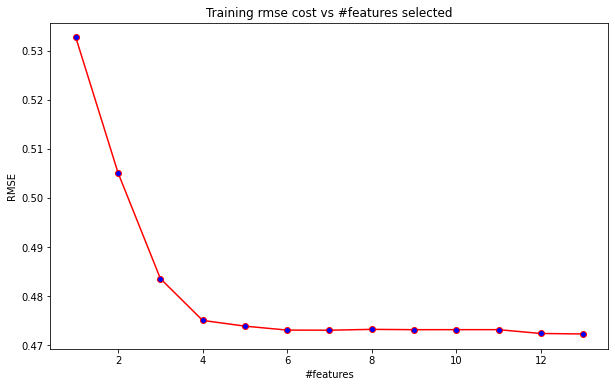

In [ ]:
x_axis = range(1,len(error_hist)+1)
plt.figure(figsize=(10, 6))
plt.title('Training rmse cost vs #features selected')
plt.xlabel('#features')
plt.ylabel('RMSE')
plt.plot(x_axis, error_hist_train, 'r', marker='o', markerfacecolor='blue')

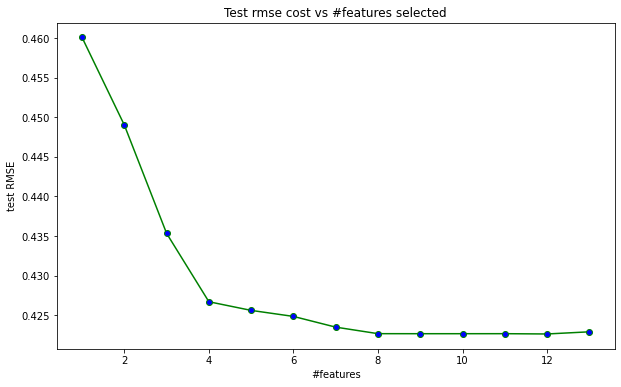

In [ ]:
x_axis = range(1,len(error_hist)+1)
plt.figure(figsize=(10, 6))
plt.title('Test rmse cost vs #features selected')
plt.xlabel('#features')
plt.ylabel('test RMSE')
plt.plot(x_axis, error_hist, color='green', marker='o', markerfacecolor='blue')

# Greedy backward feature selection

In [ ]:
def greedy_backward_feature_selection(X, y):
    n, m = X.shape
    selected_subset = [i for i in range(m)]
    error = np.zeros(m)
    error_history = []
    error_history_train = []
    W_model, X_model = generate_w_c(X[:,selected_subset],len(selected_subset))
    cost_history_full, W_full = linearRegression(X_model,y,W_model)
    W_model, X_model_test = generate_w_c(x_test[:,selected_subset],len(selected_subset))
    error_history_train.append(np.min(cost_history_full))
    test_rmse_temp = rmse(X_model_test,y_test,W_full)
    error_history.append(test_rmse_temp)
    print('Feature subset: ', selected_subset)
    print('Training cost: ', np.min(cost_history_full))
    print('Testing cost: ', test_rmse_temp)
    removed_subset = []
    while len(removed_subset) != m :
      error = np.zeros(m)
      error_train = np.zeros(m)
      for f in removed_subset:
        error[f]= np.inf
        error_train[f] = np.inf
      for i in range(m):
        if i not in removed_subset:
          # get feature
          temp_features = [l for l in range(m) if l not in removed_subset if l != i]
          feature = X[:, temp_features]
          W,X_model = generate_w_c(feature,len(temp_features))
          cost_history_model,W_model = linearRegression(X_model,y,W)
          W_,X_model_test = generate_w_c(x_test[:,temp_features],len(temp_features))
          # get error
          error_train[i] = np.min(cost_history_model)
          error[i] = rmse(X_model_test,y_test,W_model)
      idx_removal = np.argmin(error)
      temp_features = [l for l in range(m) if l not in removed_subset if l != idx_removal]
      print('Eliminating feature: ', idx_removal)
      print('Feature subset: ', temp_features)
      print('Training cost: ', np.min(error_train))
      print('Testing cost: ', np.min(error))
      removed_subset.append(idx_removal)
      error_history.append(np.min(error))
      error_history_train.append(np.min(error_train))
    return error_history, error_history_train

In [ ]:
err_hist,err_hist_train = greedy_backward_feature_selection(x_train,y_train)

Feature subset:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Training cost:  0.4722910103533441
Testing cost:  0.4228908392137024
Eliminating feature:  11
Feature subset:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
Training cost:  0.472285186089098
Testing cost:  0.4226183601480699
Eliminating feature:  5
Feature subset:  [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12]
Training cost:  0.4739056308247379
Testing cost:  0.4226179179360664
Eliminating feature:  3
Feature subset:  [0, 1, 2, 4, 6, 7, 8, 9, 10, 12]
Training cost:  0.4739146972558757
Testing cost:  0.42262296560809537
Eliminating feature:  4
Feature subset:  [0, 1, 2, 6, 7, 8, 9, 10, 12]
Training cost:  0.47392583950405315
Testing cost:  0.4226598596266156
Eliminating feature:  1
Feature subset:  [0, 2, 6, 7, 8, 9, 10, 12]
Training cost:  0.47394348041831363
Testing cost:  0.4226571166561808
Eliminating feature:  0
Feature subset:  [2, 6, 7, 8, 9, 10, 12]
Training cost:  0.47475749351996016
Testing cost:  0.423482555604448
Eliminating feature

In [ ]:
idx_lowest_cost_backward = np.argmin(err_hist[::-1])
print(idx_lowest_cost_backward)

11


In [ ]:
bf = [features[i] for i in selected_subset_hist[idx_lowest_cost_backward-1]]
print(bf)

['sqft_living', 'grade', 'view', 'condition', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'bedrooms', 'sqft_lot', 'waterfront', 'bathrooms']


In [ ]:
err_hist[::-1]

[0.613953330574272,
 0.5142341307293727,
 0.4554568484150243,
 0.4431885617507434,
 0.4320250659907873,
 0.42498076744035274,
 0.4240572055769446,
 0.423482555604448,
 0.4226571166561808,
 0.4226598596266156,
 0.42262296560809537,
 0.4226179179360664,
 0.4226183601480699,
 0.4228908392137024]

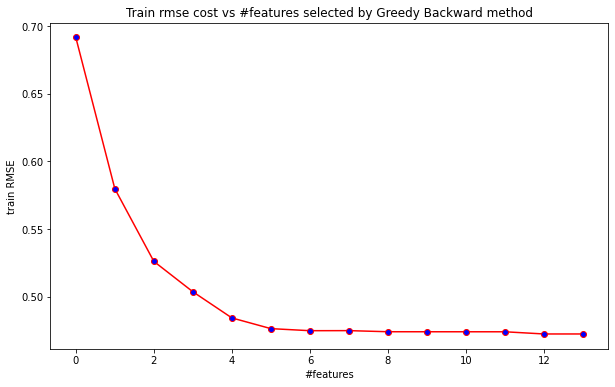

In [ ]:
x_axis = range(len(err_hist_train))
plt.figure(figsize=(10, 6))
plt.title('Train rmse cost vs #features selected by Greedy Backward method')
plt.xlabel('#features')
plt.ylabel('train RMSE')
plt.plot(x_axis, err_hist_train[::-1], color='red', marker='o', markerfacecolor='blue')

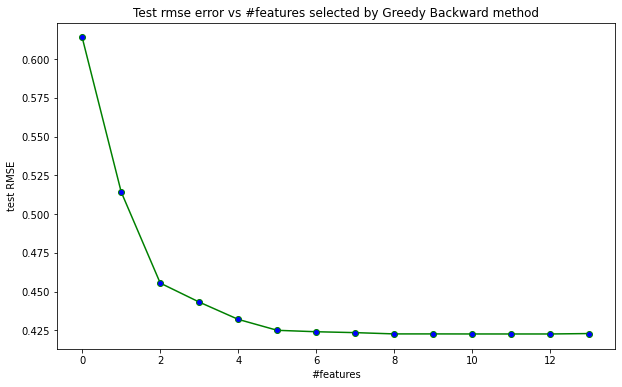

In [ ]:
x_axis = range(len(err_hist))
plt.figure(figsize=(10, 6))
plt.title('Test rmse error vs #features selected by Greedy Backward method')
plt.xlabel('#features')
plt.ylabel('test RMSE')
plt.plot(x_axis, err_hist[::-1], color='green', marker='o', markerfacecolor='blue')